In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of data points
num_data_points = 1000

# Generate random values for Time of Day (in hours)
time_of_day = np.random.randint(0, 24, size=num_data_points)

# Generate random values for Day of the Week
days_of_week = np.random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], size=num_data_points)

# Generate synthetic traffic flow data
# The formula used here is just an example; you can modify it based on your requirements
traffic_flow = 1000 + 50 * time_of_day + np.random.normal(0, 200, size=num_data_points)

# Create a DataFrame
traffic_data = pd.DataFrame({
    'Time of Day': time_of_day,
    'Day of the Week': days_of_week,
    'Traffic Flow': traffic_flow
})

# Display the first few rows of the dataset
# print(traffic_data.head())
traffic_data.head()

# Save the DataFrame to a CSV file
traffic_data.to_csv('Regression_data.csv', index=False)


                            OLS Regression Results                            
Dep. Variable:           Traffic Flow   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     3188.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          5.76e-313
Time:                        18:24:27   Log-Likelihood:                -6713.4
No. Observations:                1000   AIC:                         1.343e+04
Df Residuals:                     998   BIC:                         1.344e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1006.2845     11.901     84.553      

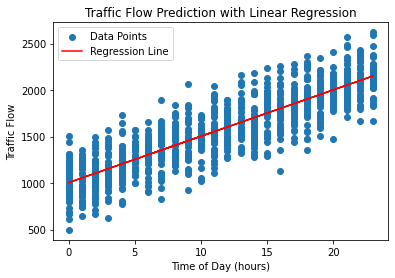

In [3]:
# Perform linear regression
X = sm.add_constant(traffic_data[['Time of Day']])
y = traffic_data['Traffic Flow']

model = sm.OLS(y, X).fit()

# Display regression summary
print(model.summary())

# Plot the data points and regression line
plt.scatter(traffic_data['Time of Day'], traffic_data['Traffic Flow'], label='Data Points')
plt.plot(traffic_data['Time of Day'], model.predict(X), color='red', label='Regression Line')
plt.title('Traffic Flow Prediction with Linear Regression')
plt.xlabel('Time of Day (hours)')
plt.ylabel('Traffic Flow')
plt.legend()
plt.show()


/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


Intercept: 1011.4008616877131
Coefficient: 49.79643043116715


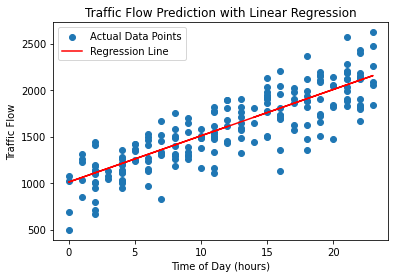

In [4]:
# Split the data into training and testing sets
X = traffic_data[['Time of Day']]
y = traffic_data['Traffic Flow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the data points and regression line
plt.scatter(X_test, y_test, label='Actual Data Points')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.title('Traffic Flow Prediction with Linear Regression')
plt.xlabel('Time of Day (hours)')
plt.ylabel('Traffic Flow')
plt.legend()
plt.show()


Accuracy: 0.845
Confusion Matrix:
 [[ 68  21]
 [ 10 101]]


/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


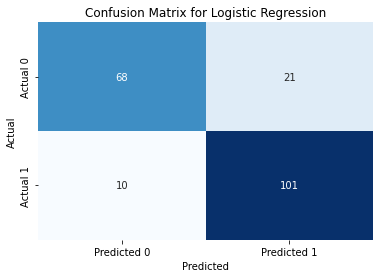

/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


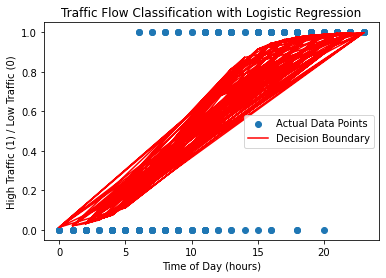

In [7]:
# Define a threshold for traffic flow to create a binary target variable
threshold = 1500
traffic_data['HighTraffic'] = np.where(traffic_data['Traffic Flow'] > threshold, 1, 0)

# Split the data into training and testing sets
X = traffic_data[['Time of Day']]
y = traffic_data['HighTraffic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Plotting confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Plot the decision boundary
plt.scatter(X_test, y_test, label='Actual Data Points')
plt.plot(X_test, model.predict_proba(X_test)[:, 1], color='red', label='Decision Boundary')
plt.title('Traffic Flow Classification with Logistic Regression')
plt.xlabel('Time of Day (hours)')
plt.ylabel('High Traffic (1) / Low Traffic (0)')
plt.legend()
plt.show()